In [1]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
train = pd.read_csv('../../../avysotsk/PycharmProjects/OpenDataSciense/data/mlbootcamp5_train.csv', sep=';', index_col='id')

In [3]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


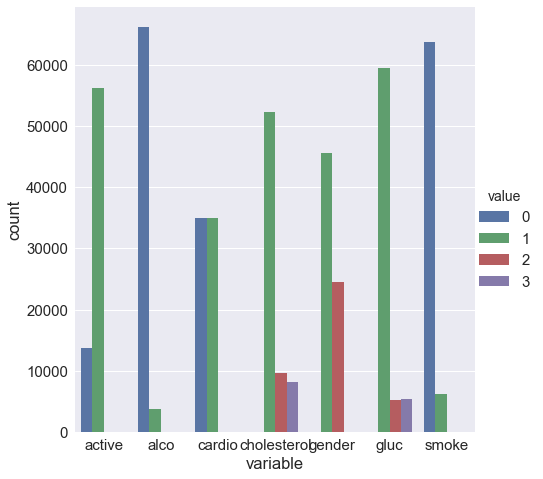

In [4]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])

train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
   .reset_index()
sns.factorplot(x='variable', y='count', hue='value', data=train_uniques, kind='bar', size=7);

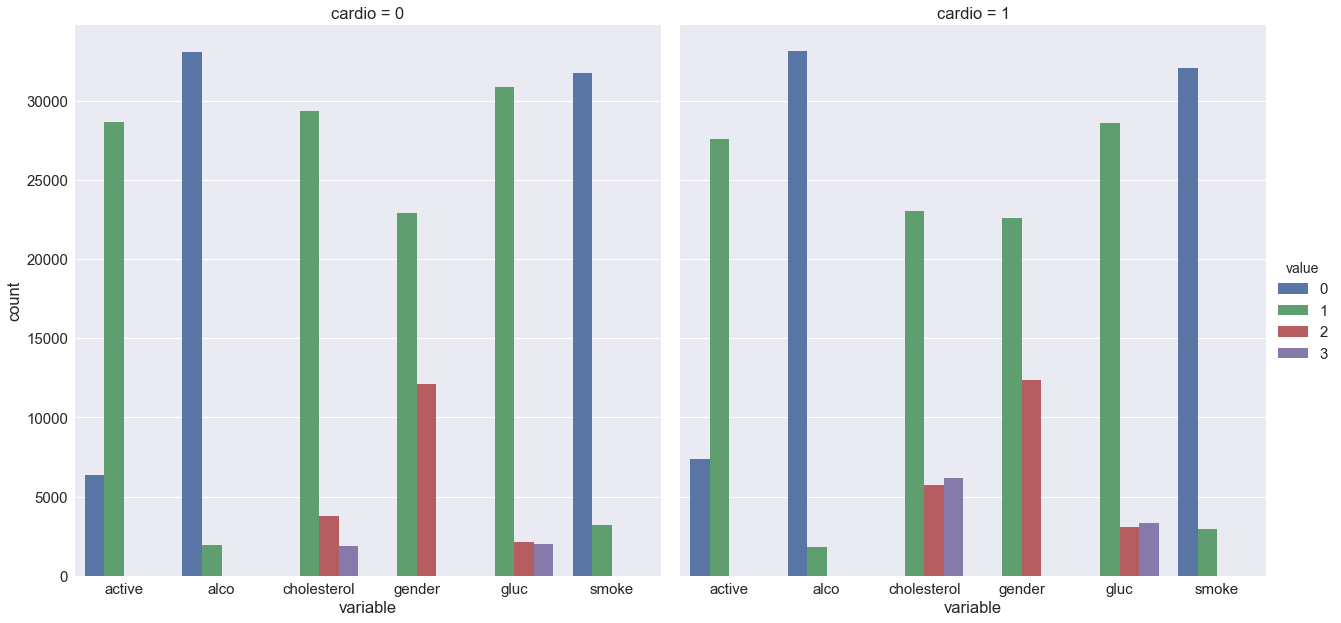

In [5]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

In [6]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## Answer 1

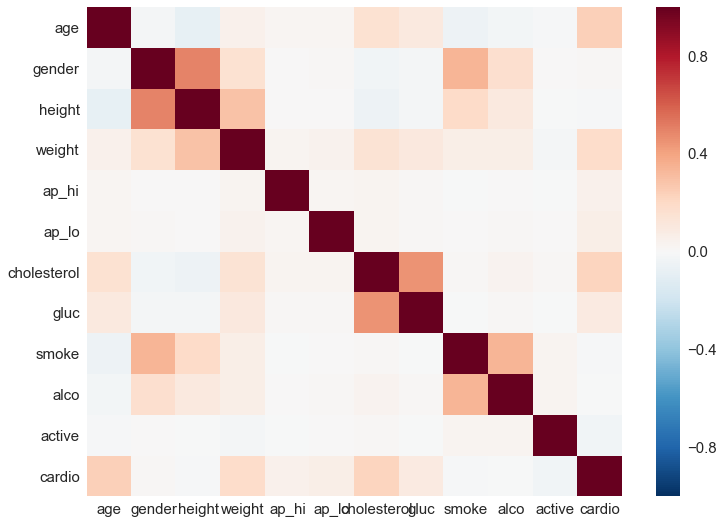

In [7]:
sns.heatmap(train.corr());

**Height, Smoke**

## Answer 2

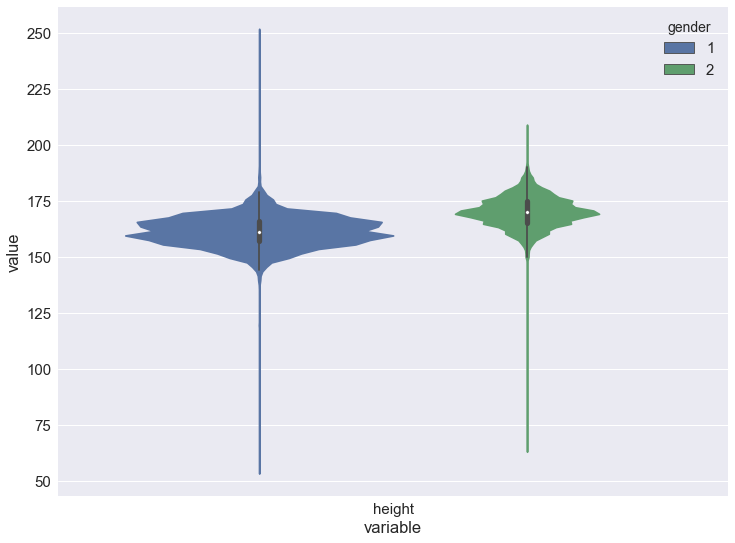

In [8]:
t=pd.melt(train, value_vars=['height'], id_vars=['gender'])
sns.violinplot(x='variable', y='value', hue='gender', data=t, scale='count');

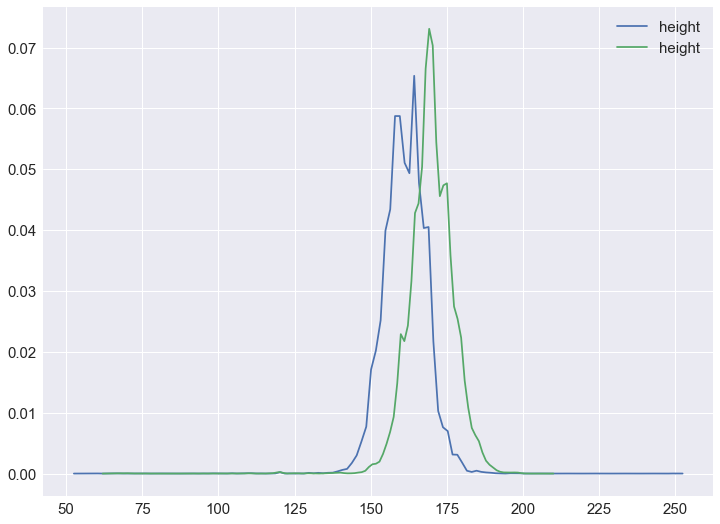

In [9]:
sns.kdeplot(train[train['gender']==1]['height'])
sns.kdeplot(train[train['gender']==2]['height'])

## Answer 3.1

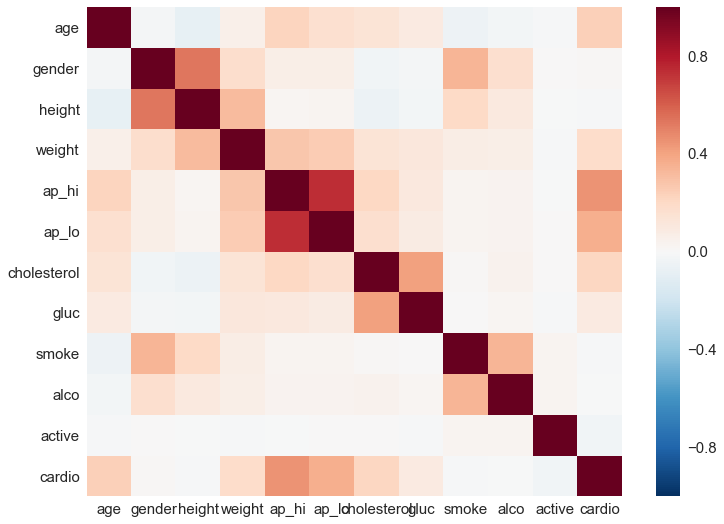

In [10]:
sns.heatmap(train.corr(method='spearman'));

**Ap_hi, Ap_lo**

## Answer 3.2

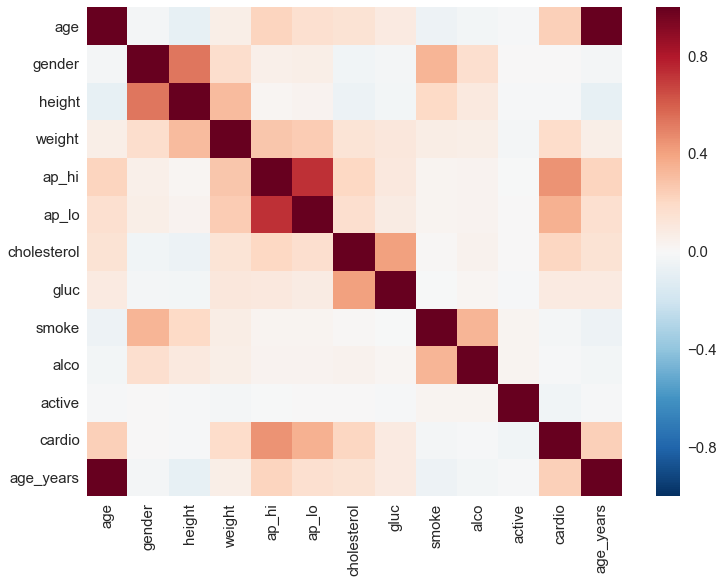

In [16]:
tc=train[(train['ap_lo']  < train['ap_hi']) & \
     (train['ap_lo'] > train['ap_lo'].quantile(0.05)) & \
     (train['ap_lo'] < train['ap_lo'].quantile(0.95)) & \
     (train['ap_hi'] > train['ap_hi'].quantile(0.05)) & \
     (train['ap_hi'] < train['ap_hi'].quantile(0.95))]
#sns.heatmap(tc.corr(method='spearman'));
#tc.info()
tc1=train[((train['ap_lo'] - train['ap_lo'].mean()).abs() < 2 * train['ap_lo'].std()) & \
         ((train['ap_hi'] - train['ap_hi'].mean()).abs() < 2 * train['ap_hi'].std())]
sns.heatmap(tc1.corr(method='spearman'));


Природа данных

## Answer 4.1

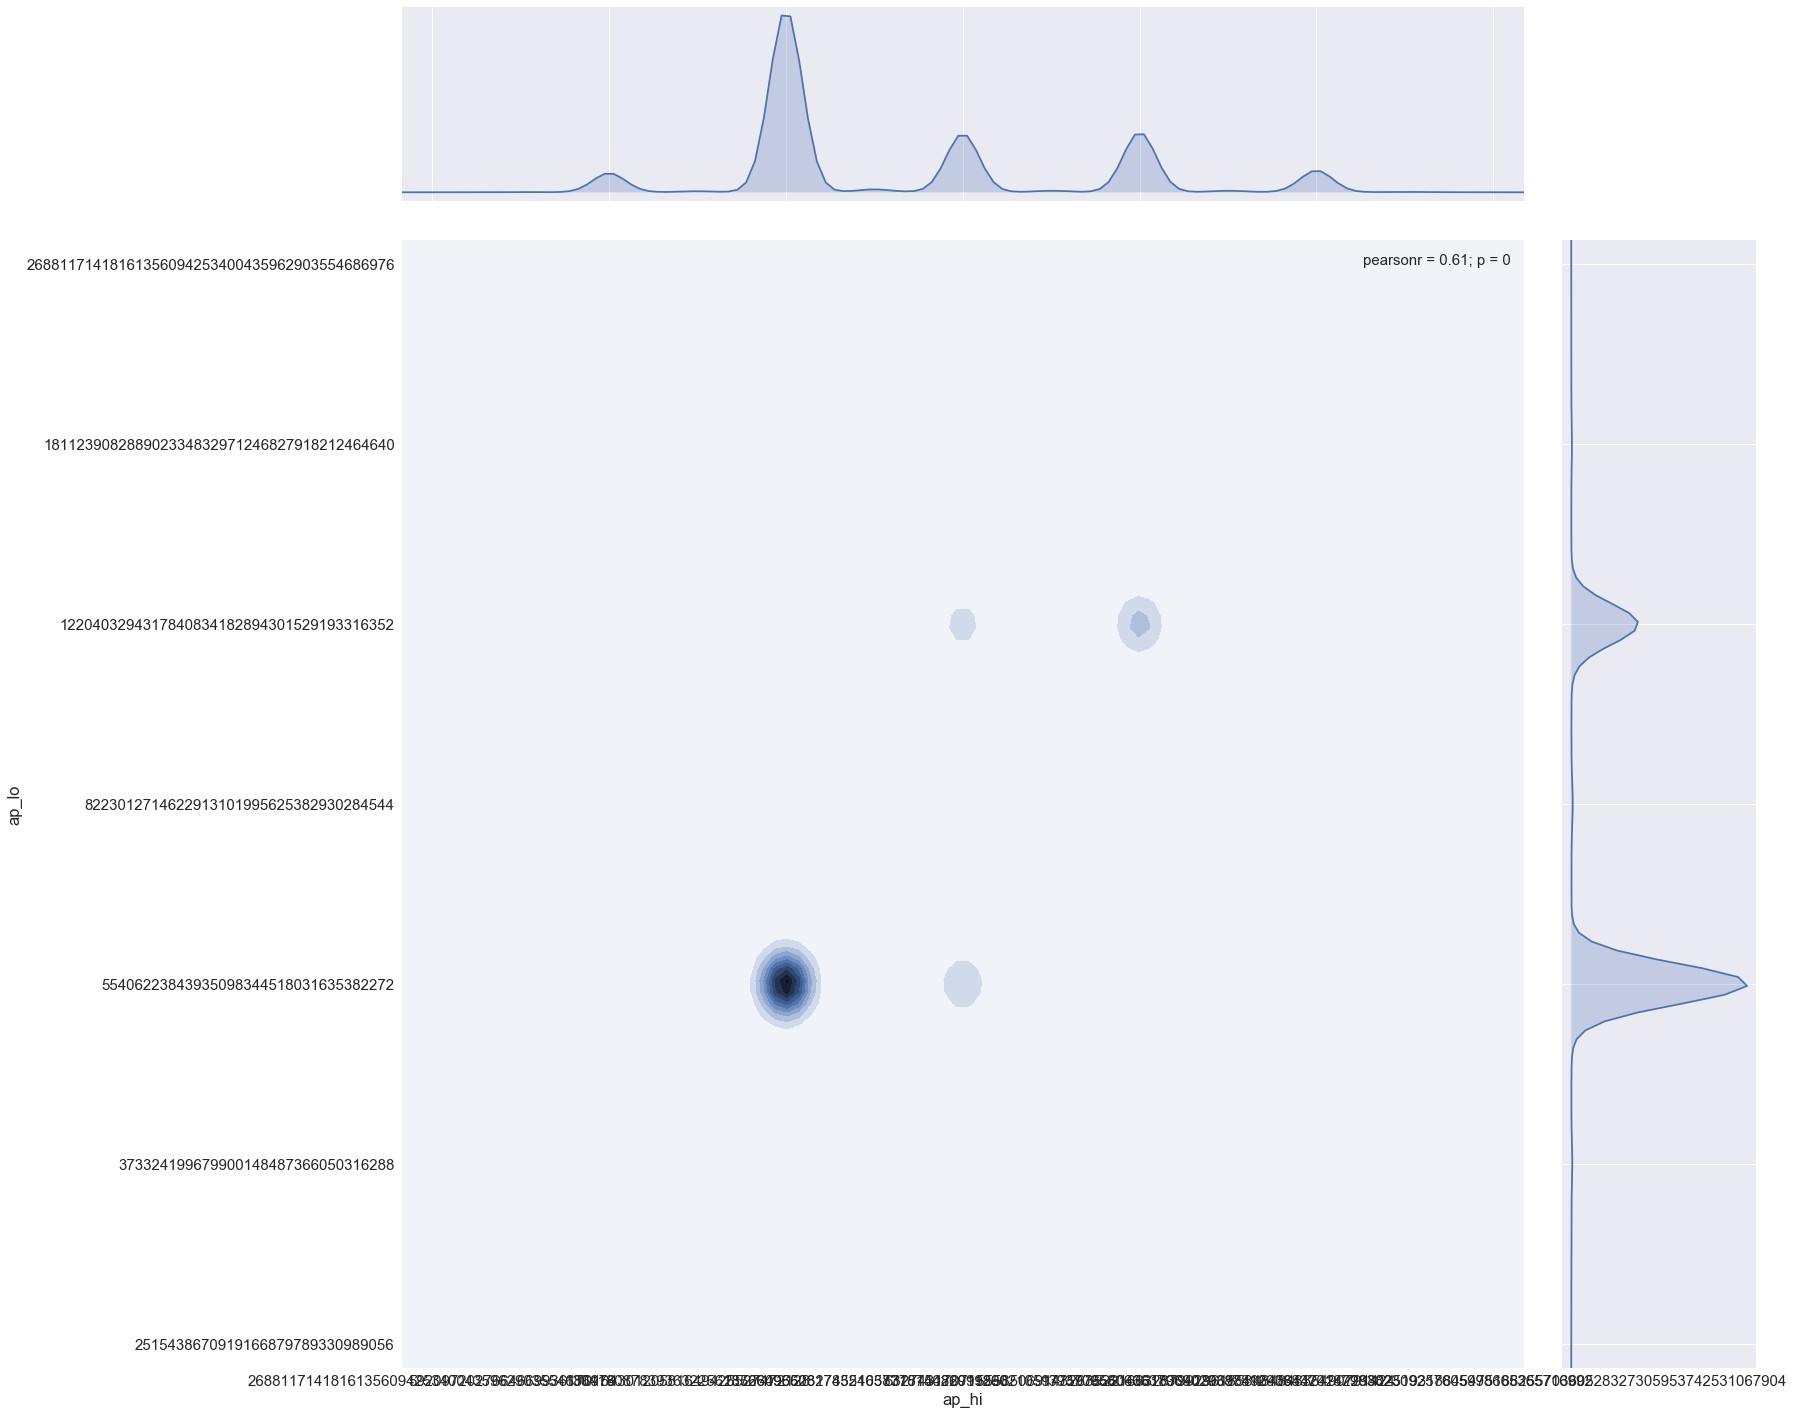

In [17]:
g=sns.jointplot(data=tc,x='ap_hi',y='ap_lo',size=20,kind='kde')
g.ax_joint.grid(True) 

g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

In [ ]:
4

## Answer 5

In [14]:
train['age_years'] = (train['age'] // 365.25).astype(int)

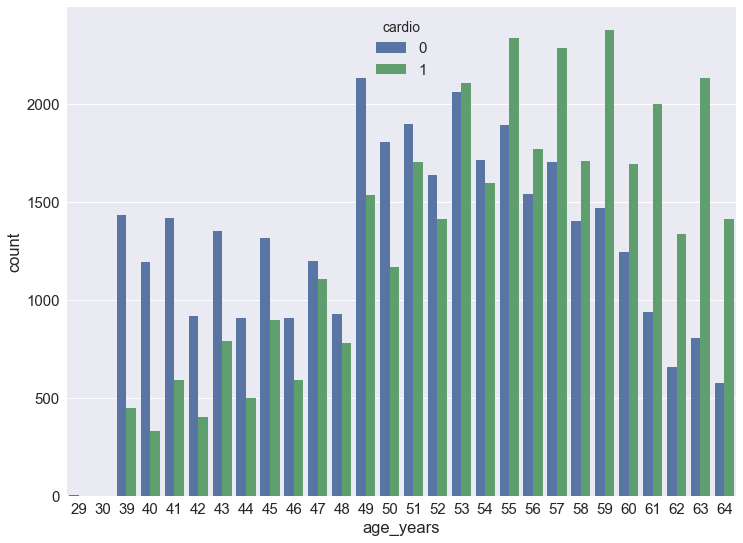

In [15]:
sns.countplot(x='age_years',hue='cardio',data=train)

53 года